<a href="https://colab.research.google.com/github/JoaoSiqueiraDS/DS_Days/blob/November/COVID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing Covid-19 through Pandas, Matplotlib and Seaborn

The Coronavirus outbreak in 2020 can be considered one of the greatest challenges the world has faced in the last century. I have written this article on november 13 and the number of deaths is 1.297.347 in the whole world. In contrary of what many people think, Covid's proagnosis is not so terrible when compared to other deseases. Ebola outbreak in Western Africa in 2014 presented a fatality rate of around 70% in patients between 15 and 44 years old (Yes, only 3 in 10 patients could survive!). The problem about Covid-19 is how contagious it is. Differently from other deseases, such as Ebola that once you have it you need to be hospitalized, Covid-19 is a brief and mild desease for many people and some are even asymptomatics. This way, infected people can move around and infect many others. The desease has its origin in China and in a so globalized world it soon was present in every continent. I don't need to describe how serious this desease was ... I am sure everyone who is reading this article witnessed the caos Covid-19 brought to many countries. 
The Covid-19 outbreak is not the first pandemic the world has faced but it certainly is the first time we can overcome it through technology and of course data. Therefore, that's a great opportunity to analyze and have some insights from this desease. 
For this analysis, we are going to use three Python libraries: Pandas to manipulate the data, Matplotlib and Seaborn for vizualisation. This is a simple exploratory data analysis (EDA) but much can be done and you will see how easy to work with and powerful these libraries are.

Talk briefly about what I did in this EDA

## Data acquisition

The data present in this analysis was taken from the [ourworldindata.org](https://github.com/owid/covid-19-data/tree/master/public/data). The data is related to the whole world until november 17th. It is important to highlight that Covid-19 is new desease and it would be impossible to inform the axact number of Covid cases for example. No organiztion could do it. The main source of this data is the European Centre for Disease Prevention and Control (ECDC). This data is also collected from a variety of sources such as (United Nations, World Bank, Global Burden of Disease, Blavatnik School of Government, etc.). More information about the data source can be found [here.](https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv)

## Variable dictionary

This dataset features 51 variables. You can have a detailed decription of these variables [here](https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv).



## Importing the dataset

As said before, the dataset used in this analysis is obtained at `ourworldindata.org`. You can download this data [here.](https://https://github.com/owid/covid-19-data/tree/master/public/data). Let's import the data from `csv` format into a variable `df`.   

In [2]:
#importing the dataset

import pandas as pd

df = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")

## Exploratory data analysis 

In this section we are going to explore our dataset. Pandas library has some handy commands to make it. Let's do it!



In [3]:
# A very first look on the data

df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2019-12-31,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-01,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-01-02,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [4]:
# How big is the dataset?

df.shape

print("This data set has {} rows and {} columns.".format(df.shape[0], df.shape[1]))

This data set has 58912 rows and 50 columns.


In [5]:
# The columns reprsent the variables of this dataset. Let's see what we have here.

df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
     

In [6]:
# And let's see what kind of variables there are in the dataset.

df.dtypes

iso_code                               object
continent                              object
location                               object
date                                   object
total_cases                           float64
new_cases                             float64
new_cases_smoothed                    float64
total_deaths                          float64
new_deaths                            float64
new_deaths_smoothed                   float64
total_cases_per_million               float64
new_cases_per_million                 float64
new_cases_smoothed_per_million        float64
total_deaths_per_million              float64
new_deaths_per_million                float64
new_deaths_smoothed_per_million       float64
reproduction_rate                     float64
icu_patients                          float64
icu_patients_per_million              float64
hosp_patients                         float64
hosp_patients_per_million             float64
weekly_icu_admissions             

Well ... Now we have a better sense of how this dataset looks like ... We could figure out how big the dataset is (df.shape), the name of the variables (df.columns) and what kind of variables are present in the dataset (df.dtypes). By taking a look at the first 5 rows it was possible to see that there plenty of null values in aour dataset. And we are going to work on it now. Let's see the percentage of null values in our dataset.

In [7]:
# Knowing the percentage of null values in our dataset

df.isnull().sum()/df.shape[0]

iso_code                              0.005602
continent                             0.011203
location                              0.000000
date                                  0.000000
total_cases                           0.061991
new_cases                             0.016075
new_cases_smoothed                    0.029892
total_deaths                          0.223791
new_deaths                            0.016075
new_deaths_smoothed                   0.029892
total_cases_per_million               0.066981
new_cases_per_million                 0.017161
new_cases_smoothed_per_million        0.030995
total_deaths_per_million              0.228527
new_deaths_per_million                0.017161
new_deaths_smoothed_per_million       0.030995
reproduction_rate                     0.342103
icu_patients                          0.921510
icu_patients_per_million              0.921510
hosp_patients                         0.911801
hosp_patients_per_million             0.911801
weekly_icu_ad

The percentage of null values varies a lot in our dataset. Some variables, such as date and location, present no null value. On the other hand, information about hospitalization (icu_patients, weekly_icu_admissions, etc) is almost non existent, featuring more than 90% of null values. Let's see the ten variables that present null values the most and the least.  

In [8]:
# Checking the varibles that present null values the most

(df.isnull().sum()/df.shape[0]).sort_values(ascending = False)[0:11]

weekly_icu_admissions_per_million     0.993278
weekly_icu_admissions                 0.993278
weekly_hosp_admissions                0.988186
weekly_hosp_admissions_per_million    0.988186
icu_patients                          0.921510
icu_patients_per_million              0.921510
hosp_patients_per_million             0.911801
hosp_patients                         0.911801
new_tests                             0.617158
new_tests_per_thousand                0.617158
total_tests                           0.613288
dtype: float64

In [9]:
#Checking the variables that present null values the least

(df.isnull().sum()/df.shape[0]).sort_values(ascending=True)[0:11]

location                  0.000000
date                      0.000000
iso_code                  0.005602
population                0.005602
continent                 0.011203
new_cases                 0.016075
new_deaths                0.016075
new_deaths_per_million    0.017161
new_cases_per_million     0.017161
life_expectancy           0.018434
new_deaths_smoothed       0.029892
dtype: float64

More detailed information is missed but very important information such as `new_cases` and `new_deaths` are almost complete and and therefore much can be analyzed in this data.

One important thing to do is to set the date in the dataset to datetime format so that we can manipulate date through dates ... Let's convert the date into this format.

In [10]:
# Converting the date into datetime format

df["date"] = pd.to_datetime(df.date)

So far we have only had a first impression of the dataset. Finally, we are going to explore and extract information about the COVID-19 outbreak. Let's use the Pandas library to know what are the countries that present higher numbers of deaths and Covid cases. 

In [11]:
# Finding the 5 countries with the highest number of deaths 

df.loc[df.date == "2020-11-18"].sort_values(by="total_deaths", ascending=False)[1:6]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
55652,USA,North America,United States,2020-11-18,11359802.0,154316.0,157425.143,248687.0,1467.0,1286.286,34319.369,466.208,475.601,751.314,4.432,3.886,NaN,15350.0,46.374,79410.0,239.907,NaN,NaN,NaN,NaN,175308949.0,1465285.0,529.630,4.427,1459499.0,4.409,9.271,0.108,tests performed,75.46,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
7843,BRA,South America,Brazil,2020-11-18,5911758.0,35294.0,30244.857,166699.0,685.0,552.857,27812.262,166.043,142.289,784.247,3.223,2.601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.125594e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.759
24965,IND,Asia,India,2020-11-18,8912907.0,38617.0,39556.571,130993.0,474.0,488.857,6458.608,27.983,28.664,94.922,0.343,0.354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127480186.0,937279.0,92.377,0.679,958719.0,0.695,24.237,0.041,samples tested,61.57,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.9,20.6,59.550,0.53,69.66,0.640
34943,MEX,North America,Mexico,2020-11-18,1011153.0,1757.0,4660.286,99026.0,165.0,454.857,7842.484,13.627,36.145,768.044,1.280,3.528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.76,1.289328e+08,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,0.774
55322,GBR,Europe,United Kingdom,2020-11-18,1410732.0,20051.0,25279.571,52745.0,598.0,425.000,20780.896,295.363,372.383,776.964,8.809,6.260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34546200.0,336942.0,508.885,4.963,310925.0,4.580,12.299,0.081,tests performed,NaN,6.788600e+07,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922


In [12]:
# Finding the 5 countries with the highest number of Covid-19 cases

df.loc[df.date == "2020-11-18"].sort_values(by="total_cases", ascending=False)[1:6]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
55652,USA,North America,United States,2020-11-18,11359802.0,154316.0,157425.143,248687.0,1467.0,1286.286,34319.369,466.208,475.601,751.314,4.432,3.886,NaN,15350.0,46.374,79410.0,239.907,NaN,NaN,NaN,NaN,175308949.0,1465285.0,529.630,4.427,1459499.0,4.409,9.271,0.108,tests performed,75.46,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
24965,IND,Asia,India,2020-11-18,8912907.0,38617.0,39556.571,130993.0,474.0,488.857,6458.608,27.983,28.664,94.922,0.343,0.354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127480186.0,937279.0,92.377,0.679,958719.0,0.695,24.237,0.041,samples tested,61.57,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.9,20.6,59.55,0.53,69.66,0.640
7843,BRA,South America,Brazil,2020-11-18,5911758.0,35294.0,30244.857,166699.0,685.0,552.857,27812.262,166.043,142.289,784.247,3.223,2.601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.125594e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.759
19159,FRA,Europe,France,2020-11-18,2036755.0,45522.0,29585.143,46273.0,1219.0,580.857,31203.392,697.404,453.249,708.909,18.675,8.899,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,226632.0,NaN,3.472,250364.0,3.836,8.462,0.118,tests performed (incl. non-PCR),78.70,6.527351e+07,122.578,42.0,19.718,13.079,38605.671,NaN,86.060,4.77,30.1,35.6,NaN,5.98,82.66,0.901
44029,RUS,Europe,Russia,2020-11-18,1991998.0,20985.0,24984.143,34387.0,456.0,460.857,13649.949,143.797,171.201,235.633,3.125,3.158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70653231.0,577345.0,484.144,3.956,563253.0,3.860,22.544,0.044,tests performed,47.69,1.459345e+08,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.816


That's a good first approach to know more about the Covid-19 scenario in the world. However, there is a better way to display this information. Let's plot it! To do so, let's use `Matplotlib` library. Let's first plot a histogram of the total number of cases and deaths.

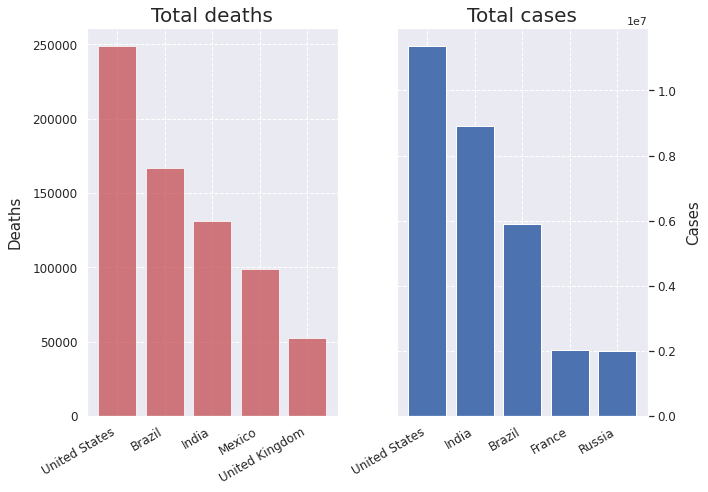

In [13]:
# importing Matplotlib

import matplotlib.pyplot as plt
import seaborn as sns

# creating a graph of total number of cases
sns.set()

top5_total_deaths = df.loc[df.date == "2020-11-18", ["location", "total_deaths"]].sort_values(by="total_deaths", ascending=False)[1:6]
top5_total_cases = df.loc[df.date == "2020-11-18", ["location", "total_cases"]].sort_values(by="total_cases", ascending=False)[1:6]


fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,7))
ax1.bar(x=top5_total_deaths["location"], height=top5_total_deaths["total_deaths"], facecolor="r", alpha=0.75)
ax1.set_title("Total deaths", fontsize = 20)
ax1.set_ylabel("Deaths", fontsize=15, labelpad=10, )
ax1.grid(ls="--")
ax1.tick_params(labelsize=12)


ax2.bar(x="location", height="total_cases", data = top5_total_cases)
ax2.set_title("Total cases", fontsize=20)
ax2.set_ylabel("Cases", fontsize=15, labelpad=10)
ax2.grid(ls="--")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax2.tick_params(labelsize=12)


fig.autofmt_xdate()

plt.tight_layout()


Well ... In this first analysis, by comparing number of cases and deaths, it possible to have a good sense of the mortality rate of these countries. Comparing India and Brazil, for example, it is clear that mortality rate in Brazil is higher. It is expected that India presents higher number of cases once its population is higher than 1 billion but the number of deaths is considerable lower than Brazil's number. Why is that? In this simple analysis it also noticeable that Mexico also presents high mortality rate. It is not even in the top five contries with higher number of cases but presents almost 100 thousand deaths! On the other hand, european countries such as France and Russia present lower mortality rate. It does not apply to UK. This is certainly related to England's health policy response that presented more flexible social distancing rules in the beginning of the pandemic when compared to other european countries. 

Let's now analyze the evolution of the number of cases and deaths of these countries. But first let's see the total number of deaths and cases in the world.

In [14]:
#Obtaining part of the dataset to be used in the world analysis

cases_world = df.loc[df.location == "World", ["date","total_cases"]]
deaths_world = df.loc[df.location=="World", ["date","total_deaths"]]


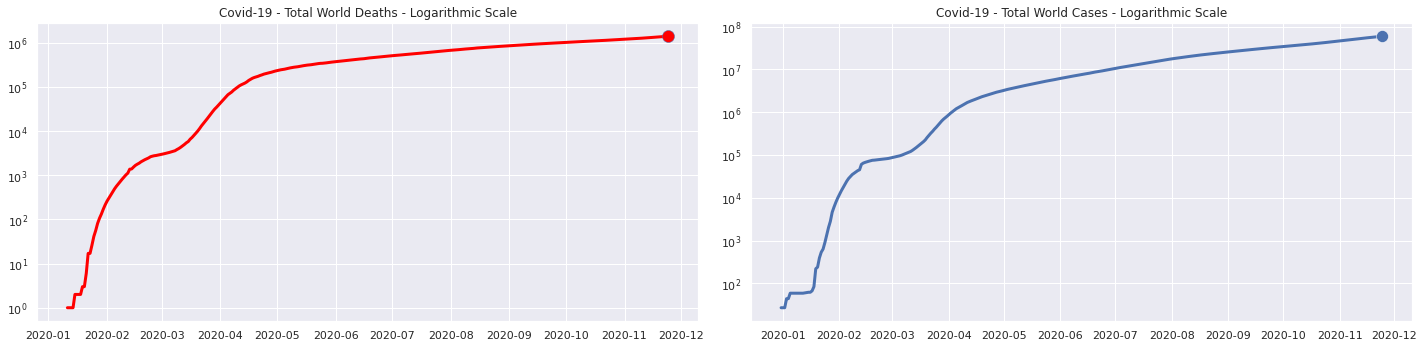

In [15]:
#Line plot for total deaths and cases in the world

fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(20,5))


ax2.plot(cases_world["date"], cases_world["total_cases"], linewidth=3, color=None, 
         marker="o", markersize=12, markeredgecolor="w", markeredgewidth=0.5, markevery=[-1])
ax2.set_yscale("log")
ax2.set_title("Covid-19 - Total World Cases - Logarithmic Scale")

ax1.plot(deaths_world["date"], deaths_world["total_deaths"], linewidth=3, color="red", 
         marker="o", markersize=12, markeredgecolor="b", markeredgewidth=0.5, markevery=[-1])
ax1.set_yscale("log")
ax1.set_title("Covid-19 - Total World Deaths - Logarithmic Scale")
plt.tight_layout()

Because our data varies a lot, the number of cases and deaths of Covid-19 has been represented in a logarithmic scale. This result shows that the increase of death follows suit the increase of cases. February presented higher rate of cases and deaths. It may be related to the beginning of the Coronavirus outbreak when nobody had idea of how serious the desease was. Yet it was winter in Europe that is when viral diseases are more common. 

Let's now plot the evolution of Covid-19 considering the top five countries in deaths and cases. From here we are going focus on Brazil in this analysis.

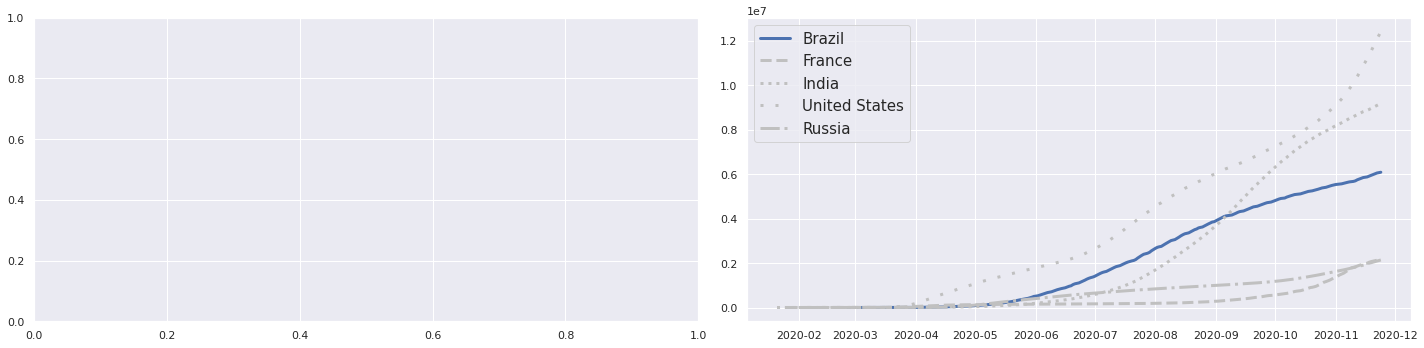

In [61]:
cases_brazil = df.loc[df.location=="Brazil", ["date", "total_cases"]]
deaths_brazil = df.loc[df.location=="Brazil", ["date", "total_deaths"]]

cases_usa = df.loc[df.location=="United States", ["date", "total_cases"]]
deaths_usa = df.loc[df.location=="United States", ["date", "total_deaths"]]

cases_india = df.loc[df.location=="India", ["date", "total_cases"]]
deaths_india = df.loc[df.location=="India", ["date", "total_deaths"]]

cases_france = df.loc[df.location=="France", ["date", "total_cases"]]

cases_russia = df.loc[df.location=="Russia", ["date", "total_cases"]]

deaths_mexico = df.loc[df.location=="Mexico", ["date", "total_cases"]]

deaths_uk = df.loc[df.location=="United Kingdom", ["date", "total_cases"]]



fig, (x1, x2) = plt.subplots(ncols=2, nrows=1, figsize=(20,5))

#Plotting the cases

x2.plot(cases_brazil["date"], cases_brazil["total_cases"],linewidth=3, color=None, 
         markeredgecolor="w", markeredgewidth=0.5, label="Brazil")
x2.plot(cases_france["date"], cases_france["total_cases"], linewidth=3, ls="--", color="#C0C0C0", label="France")
x2.plot(cases_india["date"], cases_india["total_cases"], linewidth=3, ls=":", color="#C0C0C0", label="India")
x2.plot(cases_usa["date"], cases_usa["total_cases"], linewidth=3, ls=(0, (1, 4)), color="#C0C0C0", label="United States")
x2.plot(cases_russia["date"], cases_russia["total_cases"], linewidth=3, ls="-." , color="#C0C0C0", label="Russia")
x2.legend(loc="upper left", prop={'size': 15})


plt.tight_layout()


Regarding the considerable difference in number of deaths between the european countries and emerging countries such as Brazil and Mexico, let'